In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vu-dmt-assigment-2-2023/submission_sample.csv
/kaggle/input/vu-dmt-assigment-2-2023/test_set_VU_DM.csv
/kaggle/input/vu-dmt-assigment-2-2023/training_set_VU_DM.csv


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# load the data
df_original = pd.read_csv('/kaggle/input/vu-dmt-assigment-2-2023/training_set_VU_DM.csv')

In [5]:
# sample 10000 instances of the data
df = df_original.sample(n = 10000)
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
3700723,248500,2013-02-06 16:05:47,25,215,NaN,NaN,215,8022,3,0.0,0,1.10,NaN,4.49,30,54.10,0,25031,7,14,2,0,1,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4007511,268904,2012-11-21 18:31:27,5,219,NaN,NaN,219,65983,2,3.0,1,3.40,NaN,5.15,1,115.00,1,4447,5,62,3,1,1,0,NaN,2574.38,0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2968636,199352,2013-05-27 08:24:00,5,205,NaN,NaN,219,45080,4,4.0,1,5.73,0.1484,6.17,31,280.00,1,4562,8,46,2,0,1,0,NaN,NaN,0,1.0,1.0,24.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,1.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
264711,17739,2013-04-10 12:56:22,15,55,NaN,NaN,216,102090,3,4.0,1,3.87,NaN,4.86,18,90.46,0,10160,3,11,2,0,1,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
147173,9868,2013-04-04 08:11:52,5,219,NaN,NaN,18,116919,4,4.5,0,3.04,0.0608,6.09,3,246.00,1,6695,6,115,2,2,1,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [6]:
# the shape of the data
print("the shape of the data ",df.shape)
# the name of the columns
print(df.columns)
# data type
# print(df.dtypes)

the shape of the data  (10000, 54)
Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'com

In [7]:
# Check for missing values
df.isnull().sum(axis = 0)

srch_id                           0
date_time                         0
site_id                           0
visitor_location_country_id       0
visitor_hist_starrating        9520
visitor_hist_adr_usd           9519
prop_country_id                   0
prop_id                           0
prop_starrating                   0
prop_review_score                17
prop_brand_bool                   0
prop_location_score1              0
prop_location_score2           2234
prop_log_historical_price         0
position                          0
price_usd                         0
promotion_flag                    0
srch_destination_id               0
srch_length_of_stay               0
srch_booking_window               0
srch_adults_count                 0
srch_children_count               0
srch_room_count                   0
srch_saturday_night_bool          0
srch_query_affinity_score      9322
orig_destination_distance      3211
random_bool                       0
comp1_rate                  

<AxesSubplot:>

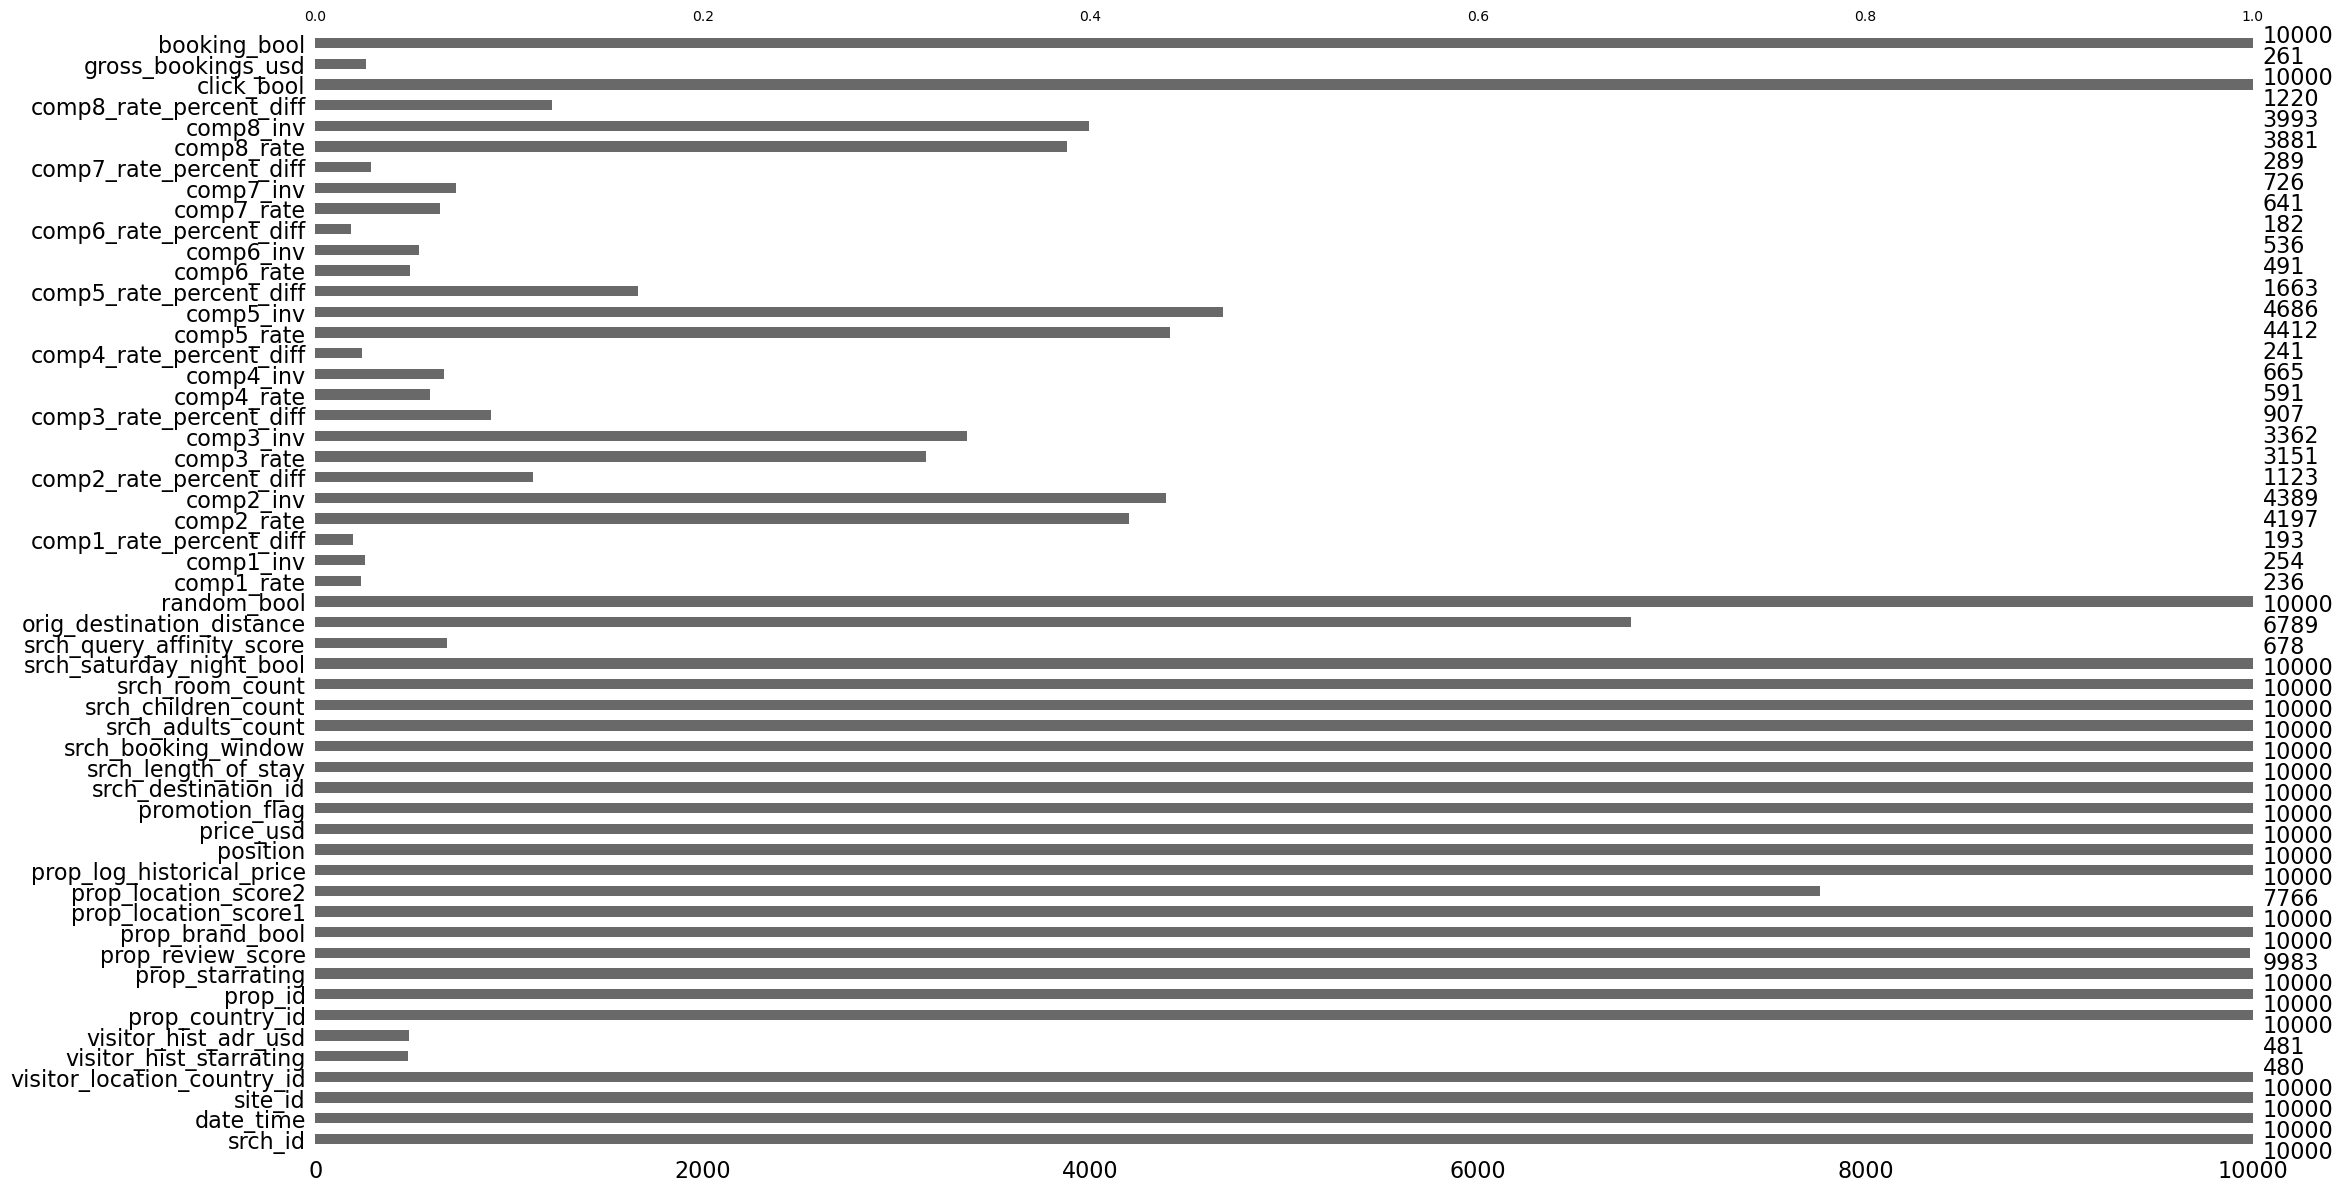

In [8]:
import missingno as msno
# visualize the missing values
msno.bar(df)

In [9]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,10000.000000,10000.000000,10000.000000,480.000000,481.000000,10000.000000,10000.000000,10000.000000,9983.000000,10000.000000,10000.000000,7766.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,678.000000,6789.000000,10000.000000,236.000000,254.000000,193.000000,4197.000000,4389.000000,1123.000000,3151.000000,3362.000000,907.000000,591.000000,665.000000,241.000000,4412.000000,4686.000000,1663.000000,491.000000,536.000000,182.000000,641.000000,726.000000,289.000000,3881.000000,3993.000000,1220.000000,10000.000000,261.000000,10000.000000
mean,166268.188400,9.936600,175.083200,3.390313,175.612079,173.006600,70539.566700,3.172700,3.772163,0.643400,2.845913,0.126488,4.325543,16.838600,185.312569,0.222000,14227.189500,2.393400,38.402700,1.973600,0.348400,1.114500,0.497000,-23.700042,1309.511688,0.292200,0.406780,0.011811,220.010363,0.050274,0.035316,16.404274,0.029514,0.057406,16.228225,0.021997,0.094737,20.024896,0.026745,0.051003,17.899579,0.146640,0.074627,21.554945,0.190328,0.088154,21.975779,-0.042515,0.011771,14.474590,0.043400,347.527165,0.026100
std,96328.125532,7.618411,66.398768,0.696509,109.958428,68.850856,40815.165271,1.045746,1.054350,0.479019,1.533461,0.154464,1.822199,10.346664,2018.685284,0.415612,8159.859235,2.037118,52.733667,0.877827,0.722682,0.437274,0.500016,14.754965,2021.250877,0.454796,0.705447,0.208178,1050.415032,0.439471,0.215366,22.139455,0.439428,0.279158,23.811154,0.568546,0.340604,52.373174,0.523067,0.258396,18.103331,0.552253,0.302682,81.904976,0.587340,0.320254,53.879393,0.464177,0.177975,15.921573,0.203766,349.379349,0.159441
min,4.000000,1.000000,2.000000,2.000000,11.100000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.190000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-115.203800,0.010000,0.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000,27.150000,0.000000
25%,82945.750000,5.000000,100.000000,2.937500,109.210000,100.000000,34869.750000,3.000000,3.500000,0.000000,1.790000,0.018000,4.460000,8.000000,85.000000,0.000000,7306.000000,1.000000,4.000000,2.000000,0.000000,1.000000,0.000000,-30.620975,139.730000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,6.000000,0.000000,0.000000,6.500000,0.000000,0.000000,7.000000,0.000000,0.000000,8.000000,0.000000,0.000000,7.000000,0.000000,0.000000,8.000000,0.000000,0.000000,7.000000,0.000000,117.380000,0.000000
50%,165943.000000,5.000000,219.000000,3.500000,145.950000,219.000000,70435.500000,3.000000,4.000000,1.000000,2.770000,0.067600,4.910000,16.000000,122.000000,0.000000,13870.000000,2.000000,17.000000,2.000000,0.000000,1.000000,0.000000,-20.200550,402.390000,0.000000,1.000000,0.000000,10.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,0.000000,0.000000,12.000000,0.000000,0.000000,11.000000,0

In [10]:
# Check the distribution of the booking_bool variable
df['booking_bool'].value_counts()

0    9739
1     261
Name: booking_bool, dtype: int64

In [11]:
# Check the distribution of the click_bool variable
df['click_bool'].value_counts()

0    9566
1     434
Name: click_bool, dtype: int64

In [12]:
# Check the distribution of the visitor_location_country_id 
print(df['visitor_location_country_id'].value_counts().head())

219    5841
100    1033
55      599
216     447
220     348
Name: visitor_location_country_id, dtype: int64


In [13]:
# Check the distribution of the visitor_hist_starrating 
print(df['visitor_hist_starrating'].value_counts())


4.00    49
3.00    43
3.50    33
2.50    20
2.00    17
        ..
2.44     1
4.08     1
2.71     1
3.44     1
2.55     1
Name: visitor_hist_starrating, Length: 169, dtype: int64


In [14]:
# average visitor_hist_starrating for each srch_id.
df.groupby('srch_id')['visitor_hist_starrating'].mean().dropna()
# df.groupby('srch_id')['visitor_hist_starrating'].mean()

srch_id
710       3.67
1577      3.00
3848      4.00
4573      3.34
4849      4.00
          ... 
325499    3.36
329614    4.60
332284    4.00
332314    2.92
332776    5.00
Name: visitor_hist_starrating, Length: 464, dtype: float64

In [15]:
df.groupby('srch_id')['visitor_location_country_id'].mean().dropna()

srch_id
4         219.0
25        219.0
45        100.0
46         77.0
52         31.0
          ...  
332452    219.0
332524    219.0
332667    219.0
332693    219.0
332776     32.0
Name: visitor_location_country_id, Length: 9720, dtype: float64

Text(0, 0.5, 'Price')

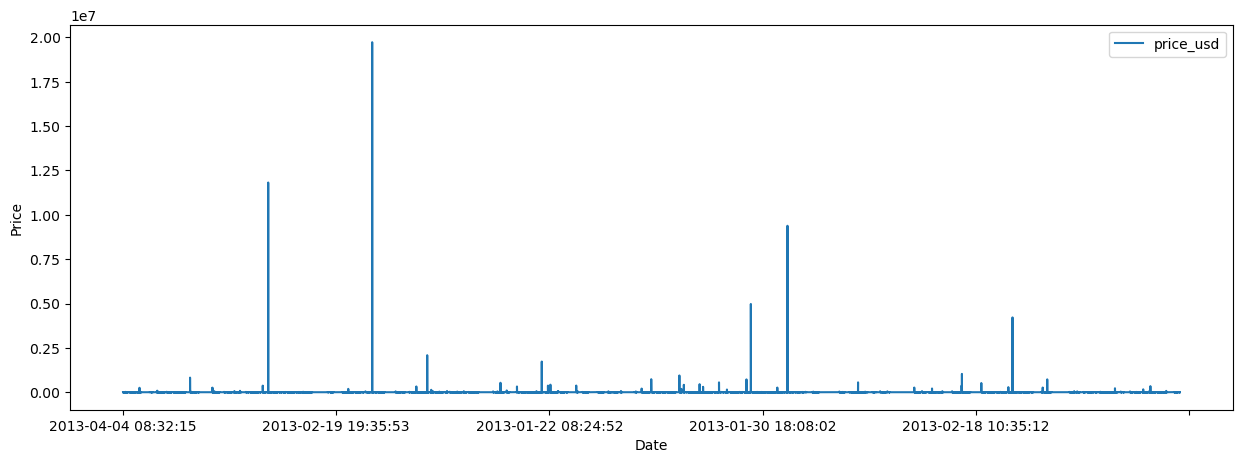

In [16]:
df_original.plot(x='date_time',y='price_usd',figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Price')
# plt.title("Time Series Graph Of Price Of Room Based on Date-Time")